In [1]:
# importing required libraries

import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("C:/Users/janan/E-Commerce Churn Data.csv")

df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [3]:
df.sample(8)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5526,55527,0,13.0,Computer,3,28.0,Debit Card,Female,3.0,6,Laptop & Accessory,3,Married,8,0,20.0,1.0,2.0,3.0,182
909,50910,0,18.0,Mobile Phone,1,26.0,Credit Card,Male,3.0,5,Fashion,5,Married,3,1,18.0,0.0,1.0,7.0,209
1393,51394,0,19.0,Computer,3,11.0,E wallet,Male,3.0,3,Laptop & Accessory,1,Single,5,1,21.0,1.0,1.0,8.0,158
5449,55450,0,12.0,Computer,2,9.0,UPI,Male,4.0,4,Mobile Phone,4,Married,7,0,14.0,3.0,4.0,9.0,151
3344,53345,0,13.0,Mobile Phone,2,9.0,Debit Card,Female,3.0,5,Laptop & Accessory,2,Divorced,10,0,12.0,1.0,2.0,5.0,177
4582,54583,1,1.0,Mobile Phone,2,9.0,COD,Male,3.0,5,Mobile Phone,1,Single,3,0,13.0,1.0,2.0,1.0,151
824,50825,0,12.0,Phone,1,24.0,Debit Card,Male,2.0,3,Laptop & Accessory,3,Single,1,0,11.0,0.0,1.0,7.0,145
5306,55307,0,8.0,Computer,1,17.0,Debit Card,Male,3.0,2,Laptop & Accessory,1,Married,3,0,14.0,4.0,8.0,3.0,172


In [4]:
df.shape

(5630, 20)

In [5]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [7]:
df.isna().sum()/len(df)*100

CustomerID                     0.000000
Churn                          0.000000
Tenure                         4.689165
PreferredLoginDevice           0.000000
CityTier                       0.000000
WarehouseToHome                4.458259
PreferredPaymentMode           0.000000
Gender                         0.000000
HourSpendOnApp                 4.529307
NumberOfDeviceRegistered       0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  0.000000
NumberOfAddress                0.000000
Complain                       0.000000
OrderAmountHikeFromlastYear    4.706927
CouponUsed                     4.547069
OrderCount                     4.582593
DaySinceLastOrder              5.452931
CashbackAmount                 0.000000
dtype: float64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
# Statistical summary of numerical variables

df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


In [10]:
# Statistical summary of categoical variables

df.describe(include=['object'])

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,2765,2314,3384,2050,2986


In [11]:
df['NumberOfDeviceRegistered'].value_counts()

NumberOfDeviceRegistered
4    2377
3    1699
5     881
2     276
1     235
6     162
Name: count, dtype: int64

In [12]:
df['SatisfactionScore'].value_counts()

SatisfactionScore
3    1698
1    1164
5    1108
4    1074
2     586
Name: count, dtype: int64

In [13]:
# Checking correlation between numerical variables
numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_df.corr()


,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
CustomerID,1.000000,-0.019083,0.029952,0.003239,0.058909,0.598417,0.411098,-0.033146,0.160814,-0.009944,0.117243,0.234302,0.139008,0.113243,0.217173
Churn,-0.019083,1.000000,-0.349408,0.084703,0.076630,0.018675,0.107939,0.105481,0.043931,0.250188,-0.010058,-0.008264,-0.028697,-0.160757,-0.154161
Tenure,0.029952,-0.349408,1.000000,-0.060688,-0.018218,-0.021226,-0.023983,-0.013903,0.237666,-0.021268,0.005825,0.129035,0.186403,0.184552,0.476577
CityTier,0.003239,0.084703,-0.060688,1.000000,0.010624,-0.009150,0.027934,-0.011554,-0.029440,0.003375,-0.031408,0.021456,0.033388,0.017525,0.055698
WarehouseToHome,0.058909,0.076630,-0.018218,0.010624,1.000000,0.060990,0.019071,0.007722,-0.011020,0.028696,0.038795,-0.003935,0.002681,0.017829,-0.009536
HourSpendOnApp,0.598417,0.018675,-0.021226,-0.009150,0.060990,1.000000,0.316800,0.031858,0.145126,0.006976,0.106843,0.191528,0.109575,0.075716,0.121469
NumberOfDeviceRegistered,0.411098,0.107939,-0.023983,0.027934,0.019071,0.316800,1.000000,-0.017228,0.084997,0.003407,0.069475,0.151685,0.103464,0.018208,0.137396
SatisfactionScore,-0.033146,0.105481,-0.013903,-0.011554,0.007722,0.031858,-0.017228,1.000000,0.053583,-0.031115,-0.027730,0.017936,0.019764,0.032082,0.003429
NumberOfAddress,0.160814,0.043931,0.237666,-0.029440,-0.011020,0.145126,0.084997,0.053583,1.000000,-0.026399,0.015533,0.042120,-0.007609,-0.064847,0.186802
Complain,-0.009944,0.250188,-0.021268,0.003375,0.028696,0.006976,0.003407,-0.031115,-0.026399,1.000000,-0.004529,-0.008174,-0.019307,-0.043546,0.000598


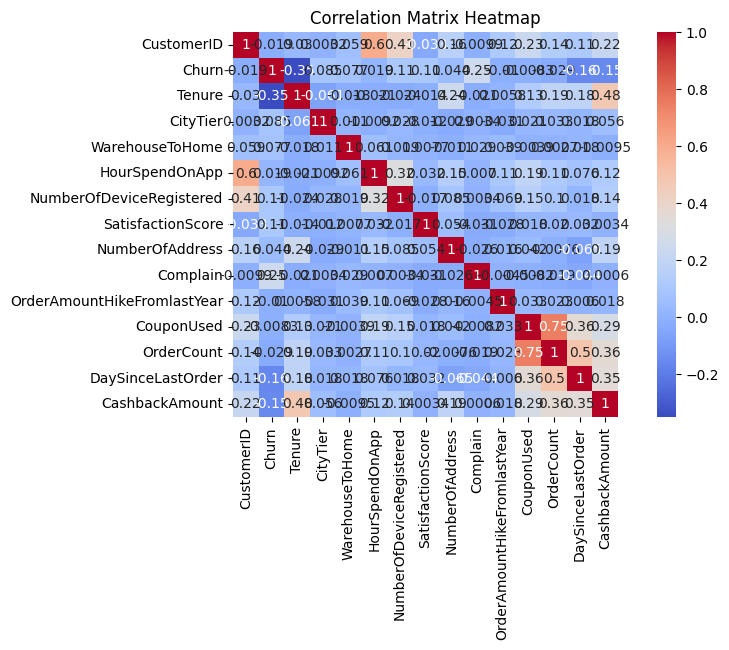

In [14]:
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()
plt.figure(figsize=(10,5)) #(width,height)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [15]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

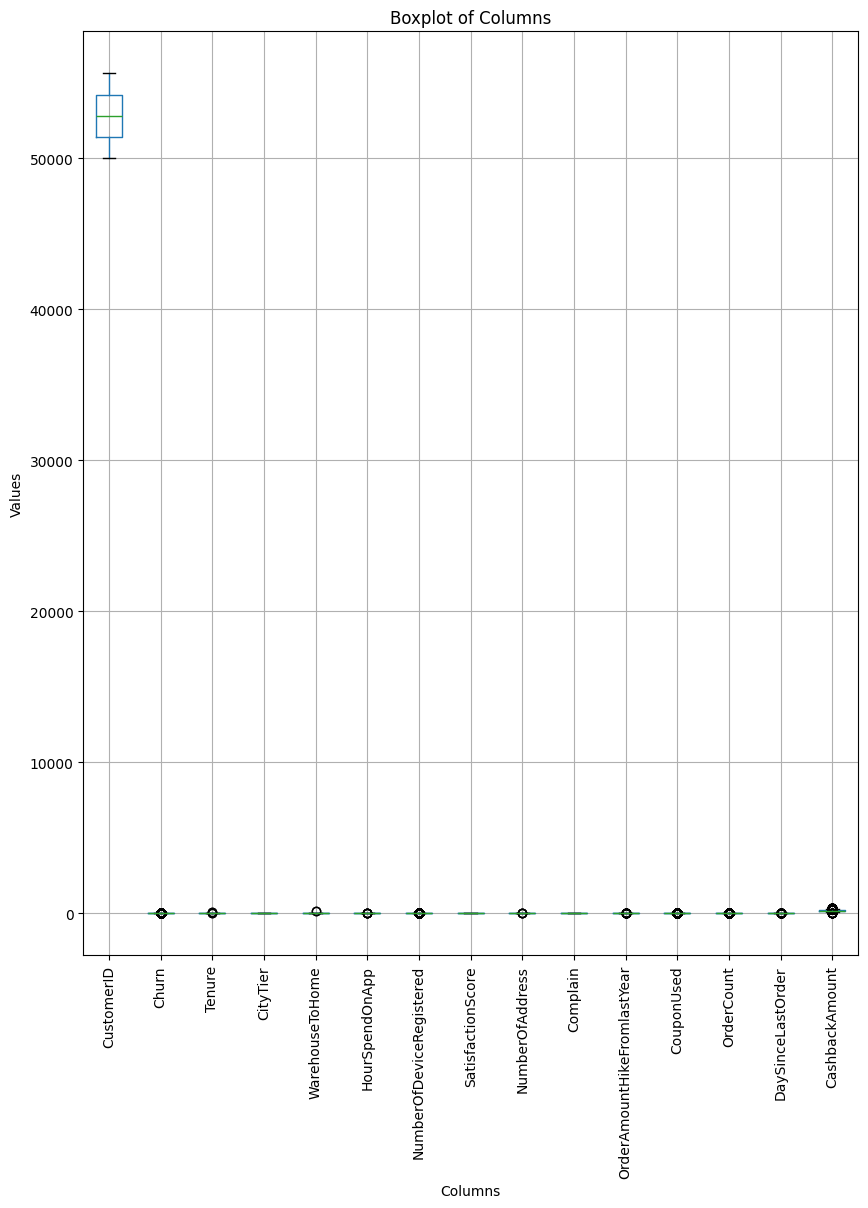

In [16]:
# Adjust figure size based on the number of columns
num_columns = len(df.columns)
fig, ax = plt.subplots(figsize=(10, 6))
if num_columns > 16:
    fig.set_size_inches(10, num_columns * 0.6)
else:
    fig.set_size_inches(num_columns, 6)

# Create a boxplot for each column
df.boxplot(ax=ax)

# Set the title and labels
plt.title("Boxplot of Columns")
plt.xlabel("Columns")
plt.ylabel("Values")

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [17]:
# Make a copy of cleaned data

df_cleaned = df.copy()

In [18]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')

In [19]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [21]:
df.shape

(5630, 20)

In [22]:
# Select appropriate bin size using sturges_rule

import math

def sturges_rule(num_data_points):
    k = 1 + math.log2(num_data_points)
    return int(k)

# Example usage
num_data_points = 100000
bins = sturges_rule(num_data_points)
print("Number of bins according to Sturges' Rule:", bins)

Number of bins according to Sturges' Rule: 17


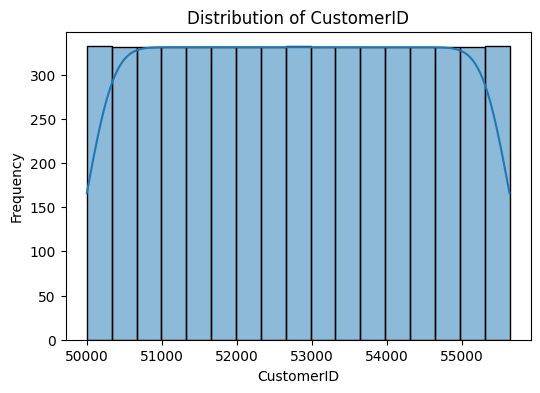

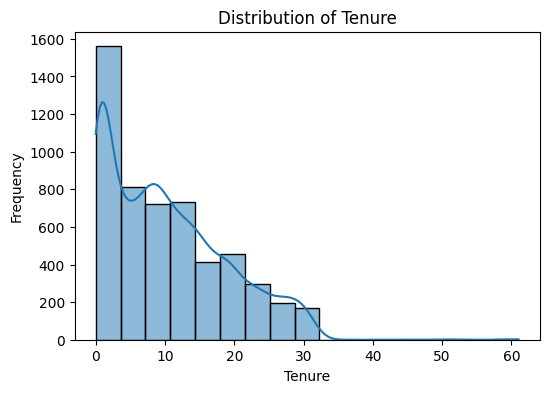

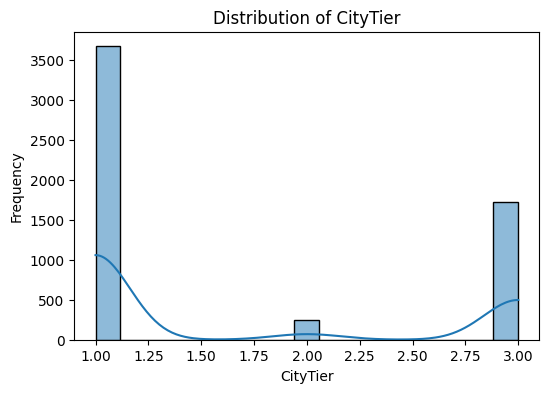

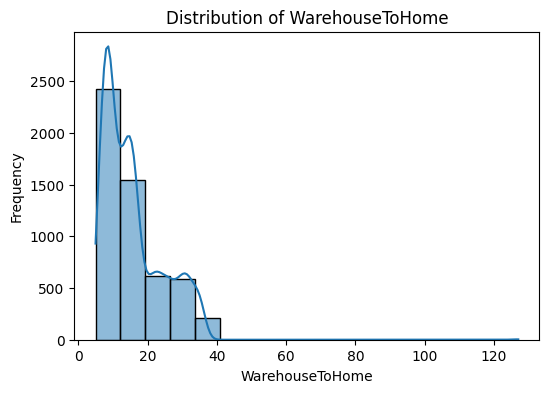

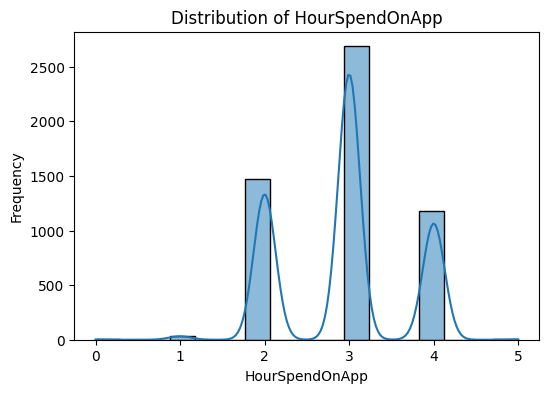

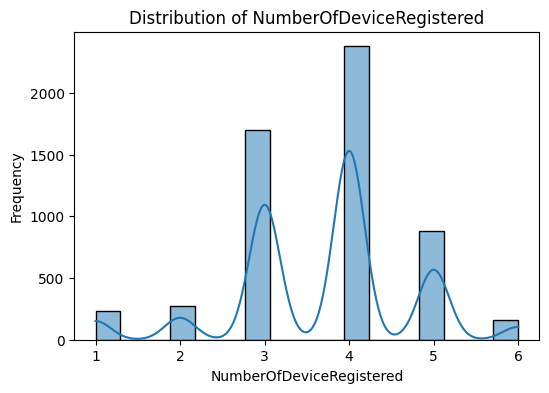

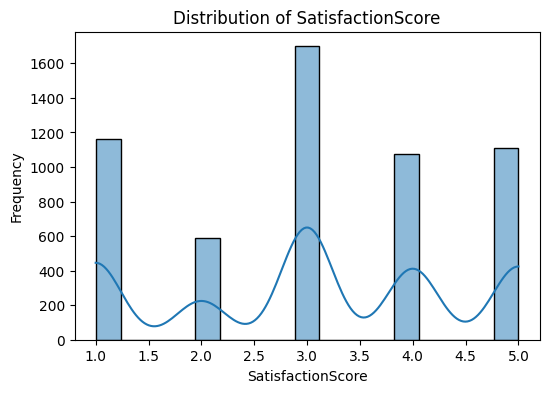

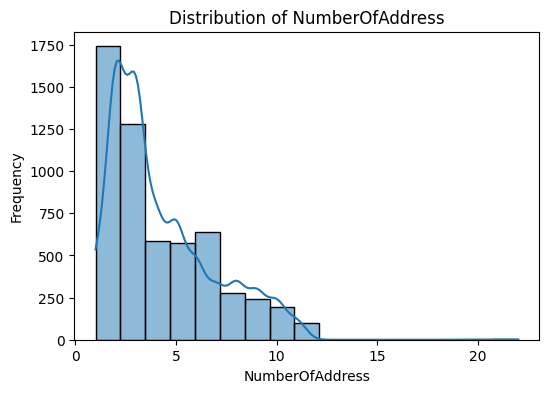

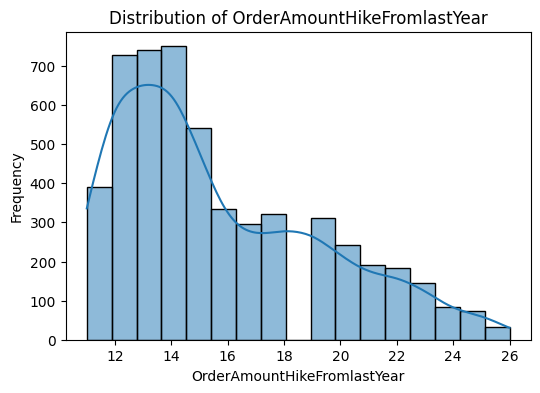

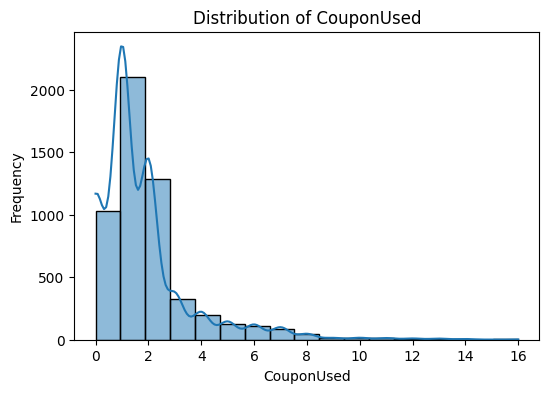

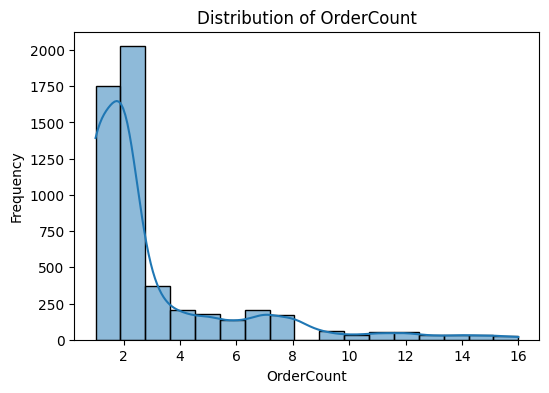

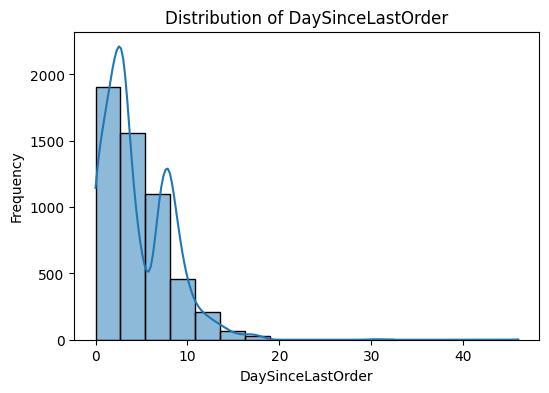

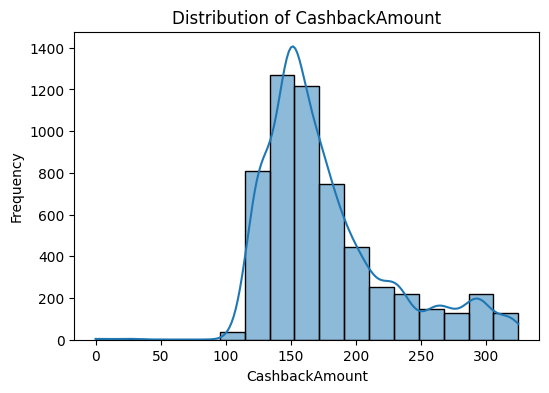

In [23]:
# check distribution of all continuous variables
continuous_vars = df.select_dtypes(include=['float64', 'int64']).columns

# Exclude binary variables from the list
binary_vars = [var for var in continuous_vars if df[var].nunique() == 2]

# Exclude binary variables from the continuous variables
continuous_vars = [var for var in continuous_vars if var not in binary_vars]

# Plot the distribution of each continuous variable
for var in continuous_vars:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=var, bins=17, kde=True)
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {var}')
    plt.show()

In [24]:
# check skewness of all continuous variables
df[continuous_vars].skew()

CustomerID                     0.000000
Tenure                         0.736513
CityTier                       0.735326
WarehouseToHome                1.619154
HourSpendOnApp                -0.027213
NumberOfDeviceRegistered      -0.396969
SatisfactionScore             -0.142626
NumberOfAddress                1.088639
OrderAmountHikeFromlastYear    0.790785
CouponUsed                     2.545653
OrderCount                     2.196414
DaySinceLastOrder              1.191000
CashbackAmount                 1.149595
dtype: float64

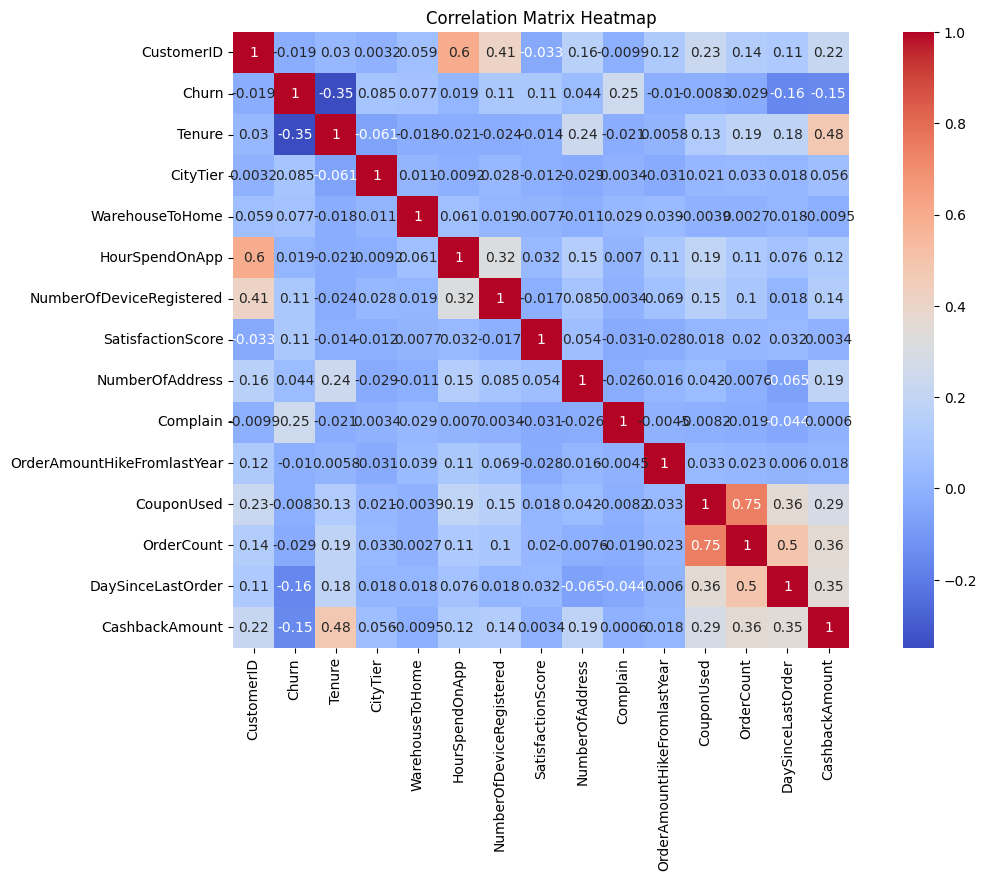

In [25]:
#checking colinearity between variables

corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()


plt.figure(figsize=(14,8)) #(width,height)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [26]:
X = df.drop(["Churn", "SatisfactionScore"], axis=1)
y = df[["Churn", "SatisfactionScore"]]


In [27]:
from sklearn.model_selection import train_test_split

# Use uppercase X and lowercase y (standard practice)
X = df.drop(["Churn", "SatisfactionScore"], axis=1)
y = df[["Churn", "SatisfactionScore"]]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [28]:
# Convert all columns to numeric (force errors to NaN)
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test  = X_test.apply(pd.to_numeric, errors='coerce')

# Replace NaN with 0 (or use imputation if needed)
X_train = X_train.fillna(0)
X_test  = X_test.fillna(0)

# Ensure correct dtype for TensorFlow
X_train = X_train.astype("float32")
X_test  = X_test.astype("float32")


In [29]:
print(X_train.shape, X_train.dtypes.unique())
print(X_test.shape, X_test.dtypes.unique())


(3941, 18) [dtype('float32')]
(1689, 18) [dtype('float32')]


In [30]:
X_train.shape, y_train.shape

((3941, 18), (3941, 2))

In [31]:
X_test.shape, y_test.shape

((1689, 18), (1689, 2))

In [32]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [33]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Convert all categorical columns in X_train and X_test to numeric using one-hot encoding
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Align columns to make sure both train and test sets have same columns
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# Train the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_jobs=-1, random_state=42)
rf_classifier.fit(X_train_encoded, y_train)

# Get feature importances
importances = rf_classifier.feature_importances_


In [34]:
X_train.head()

,CustomerID,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
1559,51560.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0,6.0,1.0,11.0,0.0,1.0,4.0,127.0
993,50994.0,0.0,0.0,1.0,9.0,0.0,0.0,2.0,3.0,0.0,0.0,2.0,0.0,21.0,1.0,1.0,0.0,121.0
1187,51188.0,0.0,0.0,2.0,24.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,17.0,1.0,1.0,0.0,130.0
188,50189.0,6.0,0.0,1.0,11.0,0.0,0.0,3.0,3.0,0.0,0.0,7.0,0.0,11.0,2.0,8.0,0.0,219.0
4630,54631.0,1.0,0.0,3.0,31.0,0.0,0.0,3.0,4.0,0.0,0.0,2.0,0.0,14.0,2.0,3.0,2.0,149.0


In [35]:
X_test.head()

,CustomerID,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
4331,54332.0,1.0,0.0,3.0,7.0,0.0,0.0,4.0,6.0,0.0,0.0,2.0,0.0,22.0,2.0,2.0,1.0,148.0
1988,51989.0,15.0,0.0,1.0,9.0,0.0,0.0,3.0,1.0,0.0,0.0,3.0,1.0,13.0,1.0,1.0,3.0,152.0
3443,53444.0,13.0,0.0,1.0,29.0,0.0,0.0,3.0,4.0,0.0,0.0,3.0,1.0,14.0,2.0,0.0,9.0,234.0
4559,54560.0,5.0,0.0,1.0,7.0,0.0,0.0,4.0,5.0,0.0,0.0,3.0,0.0,13.0,4.0,4.0,3.0,147.0
4898,54899.0,13.0,0.0,1.0,7.0,0.0,0.0,4.0,5.0,0.0,0.0,3.0,0.0,17.0,10.0,0.0,9.0,252.0


In [36]:
class_counts = df['Churn'].value_counts()
class_counts

Churn
0    4682
1     948
Name: count, dtype: int64

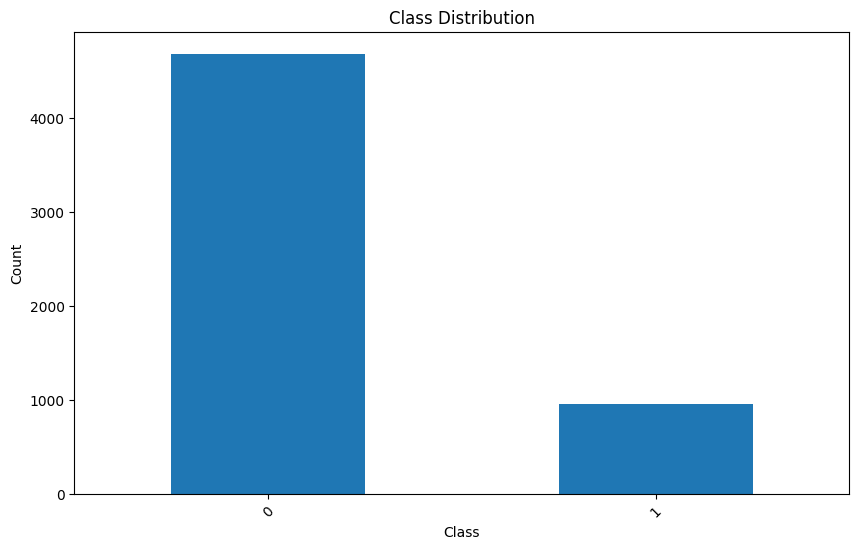

In [37]:
plt.figure(figsize=(10, 6)) 
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

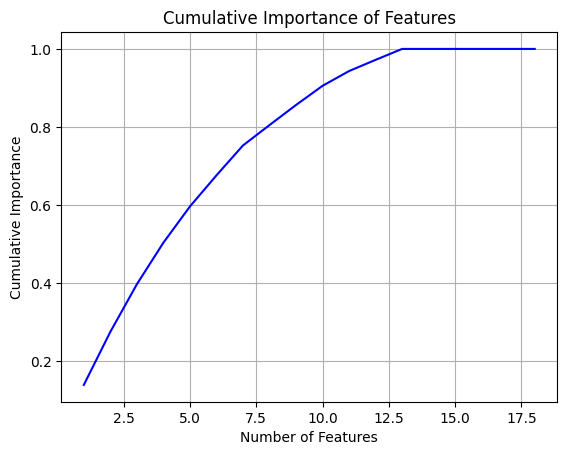

In [38]:
#check optimal number of features

sorted_indices = np.argsort(importances)[::-1]
cumulative_importance = np.cumsum(importances[sorted_indices])

plt.plot(range(1, len(importances) + 1), cumulative_importance, 'b-')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Importance of Features')
plt.grid(True)
plt.show()

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

# Step 1: One-hot encode categorical variables
X_train_encoded = pd.get_dummies(X_train, drop_first=True)

# Step 2: Drop columns with object or unsupported types (shouldn't happen after get_dummies, but just in case)
X_train_encoded = X_train_encoded.select_dtypes(include=[np.number])

# Step 3: Drop columns with NaNs or infinite values (to be safe)
X_train_encoded = X_train_encoded.replace([np.inf, -np.inf], np.nan)
X_train_encoded = X_train_encoded.dropna(axis=1)


# Step 4: Compute VIF
vif = pd.DataFrame()
vif["Variable"] = X_train_encoded.columns
vif["VIF"] = [variance_inflation_factor(X_train_encoded.values, i) for i in range(X_train_encoded.shape[1])]

# Step 5: Sort VIF values
vif = vif.sort_values(by="VIF", ascending=False)

vif


,Variable,VIF
0,CustomerID,59.181190
17,CashbackAmount,25.525492
8,NumberOfDeviceRegistered,16.533365
7,HourSpendOnApp,12.647894
13,OrderAmountHikeFromlastYear,12.547756
3,CityTier,4.317057
11,NumberOfAddress,4.159431
4,WarehouseToHome,3.814632
15,OrderCount,3.432865
1,Tenure,3.237296


In [40]:
#importing algorithms, metrics and time

import time

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

In [41]:
from sklearn.preprocessing import LabelEncoder

target_encoder = LabelEncoder()

# Encode Churn (categorical)
y_train_churn = target_encoder.fit_transform(y_train["Churn"])
y_test_churn = target_encoder.transform(y_test["Churn"])

# SatisfactionScore might already be numeric, if not encode it too
if y_train["SatisfactionScore"].dtype == 'object':
    y_train_satisfaction = target_encoder.fit_transform(y_train["SatisfactionScore"])
    y_test_satisfaction = target_encoder.transform(y_test["SatisfactionScore"])
else:
    y_train_satisfaction = y_train["SatisfactionScore"].values
    y_test_satisfaction = y_test["SatisfactionScore"].values


In [42]:
import pandas as pd
import numpy as np
import time
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time


# 1. One-hot encode categorical columns (safe for unseen test labels)
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# 2. Align columns in test to match training set
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)



In [43]:
X_train = X_train[['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
                   'NumberOfDeviceRegistered', 'NumberOfAddress',
                   'OrderAmountHikeFromlastYear', 'CouponUsed',
                   'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']]

X_test = X_test[['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
                 'NumberOfDeviceRegistered', 'NumberOfAddress',
                 'OrderAmountHikeFromlastYear', 'CouponUsed',
                 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']]


In [44]:
print('X_train columns:', X_train.columns)
print('-'*120)
print('X_test columns:', X_test.columns)

X_train columns: Index(['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'NumberOfAddress',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')
------------------------------------------------------------------------------------------------------------------------
X_test columns: Index(['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'NumberOfAddress',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')


In [45]:
import numpy as np
import time
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define algorithms
algorithms = [
    LogisticRegression(max_iter=1000),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(eval_metric='logloss', use_label_encoder=False)
]

# Initialize results dictionary
results_train = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'Building Time (s)': []
}

# Make copies of train and test
X_train_proc = X_train.copy()
X_test_proc = X_test.copy()

# Replace blank strings with NaN
X_train_proc = X_train_proc.replace(' ', np.nan)
X_test_proc = X_test_proc.replace(' ', np.nan)

# Encode categorical columns safely
for col in X_train_proc.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train_proc[col] = le.fit_transform(X_train_proc[col].astype(str))
    X_test_proc[col] = X_test_proc[col].astype(str).map(
        lambda s: le.transform([s])[0] if s in le.classes_ else -1
    ).fillna(-1).astype(int)

# ✅ Ensure y_train is a Series (pick one target at a time)
if isinstance(y_train, pd.DataFrame):
    y_train = y_train["Churn"]  # or "SatisfactionScore", depending on which one you want

# Train and evaluate
for algorithm in algorithms:
    start_time = time.time()
    algorithm_name = type(algorithm).__name__

    algorithm.fit(X_train_proc, y_train)
    y_train_pred = algorithm.predict(X_train_proc)

    accuracy = accuracy_score(y_train, y_train_pred)
    precision = precision_score(y_train, y_train_pred, average='weighted', zero_division=0)
    recall = recall_score(y_train, y_train_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_train, y_train_pred, average='weighted', zero_division=0)

    building_time = time.time() - start_time

    results_train['Algorithm'].append(algorithm_name)
    results_train['Accuracy'].append(accuracy)
    results_train['Precision'].append(precision)
    results_train['Recall'].append(recall)
    results_train['F1-score'].append(f1)
    results_train['Building Time (s)'].append(building_time)

# Convert results into DataFrame
df_train = pd.DataFrame(results_train)
print(df_train)


                    Algorithm  Accuracy  Precision    Recall  F1-score  \
0          LogisticRegression  0.852322   0.832529  0.852322  0.823711   
1      DecisionTreeClassifier  1.000000   1.000000  1.000000  1.000000   
2      RandomForestClassifier  1.000000   1.000000  1.000000  1.000000   
3  GradientBoostingClassifier  0.907638   0.902683  0.907638  0.901979   
4               XGBClassifier  0.998224   0.998223  0.998224  0.998223   

   Building Time (s)  
0           0.522212  
1           0.056338  
2           0.981911  
3           0.806544  
4           0.185342  


In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Ensure y is single target
if isinstance(y_train, pd.DataFrame):
    y_train = y_train["Churn"]  # or "SatisfactionScore"
if isinstance(y_test, pd.DataFrame):
    y_test = y_test["Churn"]

# Define algorithms again (must match training stage)
algorithms = [
    LogisticRegression(max_iter=1000),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss')
]

# Results dictionary for test
results_test = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': []
}

# Evaluate on test set
for algorithm in algorithms:
    algorithm_name = type(algorithm).__name__
    
    # Fit model on training set
    algorithm.fit(X_train_proc, y_train)
    y_test_pred = algorithm.predict(X_test_proc)

    # Metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)

    # Store results
    results_test['Algorithm'].append(algorithm_name)
    results_test['Accuracy'].append(accuracy)
    results_test['Precision'].append(precision)
    results_test['Recall'].append(recall)
    results_test['F1-score'].append(f1)

# Create DataFrame of results
df_test = pd.DataFrame(results_test)
print(df_test)


                    Algorithm  Accuracy  Precision    Recall  F1-score
0          LogisticRegression  0.859680   0.840777  0.859680  0.831529
1      DecisionTreeClassifier  0.923623   0.924944  0.923623  0.924223
2      RandomForestClassifier  0.953227   0.952126  0.953227  0.952004
3  GradientBoostingClassifier  0.894612   0.886757  0.894612  0.886864
4               XGBClassifier  0.947898   0.946640  0.947898  0.946929


In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Activation, Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint


from sklearn.metrics import recall_score

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',        # The metric to monitor (usually validation loss).
    min_delta=0.001,           # Minimum improvement required to consider the model improved.
    patience=10,               # Number of epochs to wait without improvement before stopping.
    verbose=1,                 # Print output during training.
    mode='auto',               # Automatically infer whether to minimize or maximize the metric.
    restore_best_weights=True  # Restore weights from the best epoch.
)


In [48]:
checkpoint = ModelCheckpoint('ChurnClassifier.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [49]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model]
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [50]:
print(X_train.dtypes)
print(y_train.dtype)


Tenure                         float32
CityTier                       float32
WarehouseToHome                float32
HourSpendOnApp                 float32
NumberOfDeviceRegistered       float32
NumberOfAddress                float32
OrderAmountHikeFromlastYear    float32
CouponUsed                     float32
OrderCount                     float32
DaySinceLastOrder              float32
CashbackAmount                 float32
dtype: object
int64


In [51]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=128,
    validation_split=0.3,
    callbacks=[early_stopping, checkpoint],
    verbose=1
)


Epoch 1/100
15/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6821 - loss: 1.8672
Epoch 1: val_loss improved from None to 0.78323, saving model to ChurnClassifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.6929 - loss: 1.6388 - val_accuracy: 0.8174 - val_loss: 0.7832
Epoch 2/100
21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8046 - loss: 0.7742
Epoch 2: val_loss improved from 0.78323 to 0.41154, saving model to ChurnClassifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8002 - loss: 0.6296 - val_accuracy: 0.8208 - val_loss: 0.4115
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8305 - loss: 0.4125
Epoch 3: val_loss did not improve from 0.41154
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8332 - loss: 0.3981 - val_accuracy: 0.8183 - val_loss: 0.4473
Epoch 4/100
13/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8367 - loss: 0.4113 
Epoch 4: val_loss improved from 0.41154 to 0.35263, saving model to ChurnClassifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8376 - loss: 0.3765 - val_accuracy: 0.8309 - val_loss: 0.3526
Epoch 5/100
11/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8453 - loss: 0.3808 
Epoch 5: val_loss did not improve from 0.35263
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8401 - loss: 0.3594 - val_accuracy: 0.8242 - val_loss: 0.3593
Epoch 6/100
13/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8429 - loss: 0.3638 
Epoch 6: val_loss did not improve from 0.35263
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8430 - loss: 0.3690 - val_accuracy: 0.8242 - val_loss: 0.3567
Epoch 7/100
14/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8346 - loss: 0.3671 
Epoch 7: val_loss improved from 0.35263 to 0.34817, saving model to ChurnClassifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8347 - loss: 0.3676 - val_accuracy: 0.8529 - val_loss: 0.3482
Epoch 8/100
21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8445 - loss: 0.3488
Epoch 8: val_loss improved from 0.34817 to 0.34373, saving model to ChurnClassifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8430 - loss: 0.3589 - val_accuracy: 0.8504 - val_loss: 0.3437
Epoch 9/100
14/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8334 - loss: 0.3547 
Epoch 9: val_loss improved from 0.34373 to 0.34096, saving model to ChurnClassifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8412 - loss: 0.3613 - val_accuracy: 0.8436 - val_loss: 0.3410
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8413 - loss: 0.3625
Epoch 10: val_loss did not improve from 0.34096
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8394 - loss: 0.3703 - val_accuracy: 0.8191 - val_loss: 0.4841
Epoch 11/100
16/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8375 - loss: 0.3906 
Epoch 11: val_loss improved from 0.34096 to 0.33813, saving model to ChurnClassifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8441 - loss: 0.3762 - val_accuracy: 0.8470 - val_loss: 0.3381
Epoch 12/100
15/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8662 - loss: 0.3296 
Epoch 12: val_loss did not improve from 0.33813
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8513 - loss: 0.3506 - val_accuracy: 0.8326 - val_loss: 0.3467
Epoch 13/100
20/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8598 - loss: 0.3312
Epoch 13: val_loss did not improve from 0.33813
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8568 - loss: 0.3381 - val_accuracy: 0.8233 - val_loss: 0.3710
Epoch 14/100
 8/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8581 - loss: 0.3568 
Epoch 14: val_loss did not improve from 0.33813
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8597 - loss: 0.3422 - val_accuracy: 0.8445 - val_loss: 0.3385
Epoch 15/100
15/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8739 - loss: 0.3202 
Epoch 15: val_loss did not improve from 0.338

In [52]:
model = Sequential()

# layers
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 4))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compile the model]
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Rebuild the model from scratch
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Now matches 11 features
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')   # Binary classification
])

# Compile
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=128,
    validation_split=0.3,
    callbacks=[early_stopping, checkpoint],
    verbose=1
)


Epoch 1/100
16/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2923 - loss: 20.2936
Epoch 1: val_loss did not improve from 0.33813
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.5207 - loss: 11.1063 - val_accuracy: 0.8183 - val_loss: 4.4785
Epoch 2/100
16/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7983 - loss: 5.1916  
Epoch 2: val_loss did not improve from 0.33813
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7959 - loss: 4.1848 - val_accuracy: 0.8183 - val_loss: 1.5442
Epoch 3/100
16/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7248 - loss: 3.0253 
Epoch 3: val_loss did not improve from 0.33813
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7201 - loss: 2.8668 - val_accuracy: 0.8183 - val_loss: 1.1021
Epoch 4/100
16/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7197 - loss: 2.5745 
Epoch 4: val_loss did not improve from 0.33813
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7302 - loss: 2.1291 - val_accuracy: 0.8183 - val_loss: 1.2377
Ep

In [54]:
# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 4))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
from keras.optimizers import SGD

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Check number of features
print("X_train shape:", X_train.shape)

# Rebuild model from scratch
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # <-- auto matches 11 features
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=128,
    validation_split=0.3,
    callbacks=[early_stopping, checkpoint],
    verbose=1
)


X_train shape: (3941, 11)
Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6226 - loss: 4.4059
Epoch 1: val_loss did not improve from 0.33813
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.7321 - loss: 3.4903 - val_accuracy: 0.8183 - val_loss: 2.0984
Epoch 2/100
13/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7340 - loss: 2.1828 
Epoch 2: val_loss did not improve from 0.33813
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7165 - loss: 2.0241 - val_accuracy: 0.8183 - val_loss: 1.4262
Epoch 3/100
21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7491 - loss: 1.5501
Epoch 3: val_loss did not improve from 0.33813
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7476 - loss: 1.4424 - val_accuracy: 0.8183 - val_loss: 1.0647
Epoch 4/100
18/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7351 - loss: 1.3327
Epoch 4: val_loss did not improve from 0.33813
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7607 - loss: 1.1590 - val_accuracy: 0.8183 

In [56]:
from keras.optimizers import Adam

model = Sequential()

# Input layer with BatchNormalization and Activation (ReLU)
model.add(Dense(10, input_dim=4, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# First hidden layer with BatchNormalization, Activation (ReLU), and Dropout
model.add(Dense(10, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))  # 20% dropout

# Second hidden layer with BatchNormalization, Activation (ReLU), and Dropout
model.add(Dense(5, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))  # 10% dropout

# Output layer with Sigmoid activation
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [57]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler

# 🔹 Check shape of your data
print("X_train shape:", X_train.shape)

# 🔹 Scale features (recommended for neural nets)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 🔹 Build fresh model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # auto-matches feature count
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 🔹 Compile
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 🔹 Train
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=128,
    validation_split=0.3,
    callbacks=[early_stopping, checkpoint],
    verbose=1
)


X_train shape: (3941, 11)
Epoch 1/100
16/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7787 - loss: 0.5843
Epoch 1: val_loss did not improve from 0.33813
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.8125 - loss: 0.5331 - val_accuracy: 0.8183 - val_loss: 0.4849
Epoch 2/100
14/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8348 - loss: 0.4470 
Epoch 2: val_loss did not improve from 0.33813
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8339 - loss: 0.4428 - val_accuracy: 0.8183 - val_loss: 0.4461
Epoch 3/100
17/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8447 - loss: 0.4032 
Epoch 3: val_loss did not improve from 0.33813
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8347 - loss: 0.4167 - val_accuracy: 0.8183 - val_loss: 0.4167
Epoch 4/100
16/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8243 - loss: 0.4077 
Epoch 4: val_loss did not improve from 0.33813
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8350 - loss: 0.4001 - val_accuracy: 0.820

In [58]:
x = df_cleaned.drop('Churn', axis=1)
y = df_cleaned['Churn']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [60]:
# Drop non-numeric columns like customerID
if "customerID" in X_train.columns:
    X_train = X_train.drop(columns=["customerID"])
    X_test = X_test.drop(columns=["customerID"])

# Ensure all features are numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Now scale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [61]:
# Convert scaled numpy arrays back to DataFrames

X_train = pd.DataFrame(X_train)

X_test = pd.DataFrame(X_test)

In [62]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.799212,-1.186487,NaN,-0.718205,NaN,NaN,NaN,-1.300053,-0.676003,NaN,1.407118,NaN,0.704063,1.578195,-1.282562,-0.932398,-0.686603,-0.139912,-1.026047
1,-1.149352,NaN,NaN,-0.718205,-0.772356,NaN,NaN,-1.300053,-0.676003,NaN,-1.495880,NaN,-0.852578,-0.633635,1.427706,-0.407401,-0.686603,-1.236025,-1.149308
2,-1.029340,-1.186487,NaN,0.374631,0.963901,NaN,NaN,NaN,-2.628460,NaN,1.407118,NaN,-1.241739,-0.633635,0.343599,-0.407401,-0.686603,-1.236025,-0.964416
3,-1.647343,-0.488503,NaN,-0.718205,-0.540855,NaN,NaN,0.088908,-0.676003,NaN,0.681368,NaN,1.093224,-0.633635,-1.282562,0.117595,1.666085,NaN,0.863961
4,1.100577,-1.070157,NaN,1.467467,1.774154,NaN,NaN,0.088908,0.300226,NaN,-1.495880,NaN,-0.852578,-0.633635,-0.469481,0.117595,-0.014407,-0.687969,-0.574089


In [63]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.915609,-1.070157,NaN,1.467467,-1.003857,NaN,NaN,1.477869,2.252683,NaN,1.407118,NaN,-0.852578,-0.633635,1.698732,0.117595,-0.350505,-0.961997,-0.594632
1,-0.533823,0.558475,NaN,-0.718205,-0.772356,NaN,NaN,0.088908,-2.628460,NaN,-1.495880,NaN,-0.463418,1.578195,-0.740508,-0.407401,-0.686603,-0.413940,-0.512458
2,0.366272,0.325813,NaN,-0.718205,1.542653,NaN,NaN,0.088908,0.300226,NaN,1.407118,NaN,-0.463418,1.578195,-0.469481,0.117595,NaN,1.230229,1.172114
3,1.056655,-0.604833,NaN,-0.718205,-1.003857,NaN,NaN,1.477869,1.276454,NaN,1.407118,NaN,-0.463418,-0.633635,-0.740508,1.167587,0.321692,-0.413940,-0.615176
4,1.266368,0.325813,NaN,-0.718205,-1.003857,NaN,NaN,1.477869,1.276454,NaN,-1.495880,NaN,-0.463418,-0.633635,0.343599,4.317564,NaN,1.230229,1.541898


In [64]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Handle NaN values by replacing them with column means
imputer = SimpleImputer(strategy="mean")
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Step 2: Scale the features (PCA works better with scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Step 3: Apply PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [65]:
X_train_pca.shape

(3941, 14)

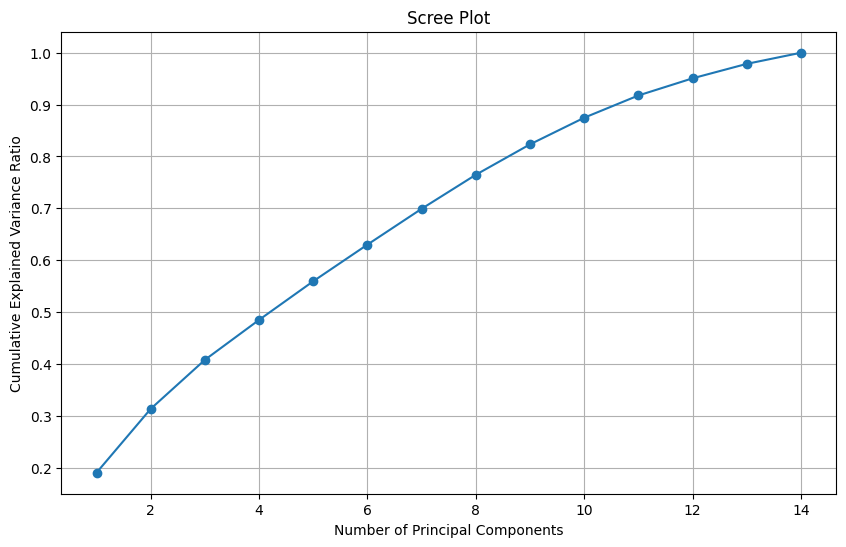

In [66]:
# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid()
plt.show()

In [67]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Handle NaN values by replacing them with column means
imputer = SimpleImputer(strategy="mean")
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Step 2: Scale the features (PCA works better with scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Step 3: Apply PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [68]:
X_train_pca.shape, X_test_pca.shape

((3941, 14), (1689, 14))

In [69]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels (Yes/No → 1/0)
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

algorithms = [
    LogisticRegression(n_jobs=-1, random_state=42),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(n_jobs=-1),
    GaussianNB(),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    RandomForestClassifier(n_jobs=-1, random_state=42),
    XGBClassifier(n_jobs=-1, random_state=42),
    SVC(random_state=42)
]

# Initialize the results dictionary for training data
results_train = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'Building Time (s)': []
}

# Apply the algorithms and calculate performance metrics for training data using X_train_pca
for algorithm in algorithms:
    start_time = time.time()  # Start timer

    algorithm_name = type(algorithm).__name__
    algorithm.fit(X_train_pca, y_train_encoded)
    y_train_pred = algorithm.predict(X_train_pca)

    accuracy = accuracy_score(y_train_encoded, y_train_pred)
    precision = precision_score(y_train_encoded, y_train_pred, average='weighted')
    recall = recall_score(y_train_encoded, y_train_pred, average='weighted')
    f1 = f1_score(y_train_encoded, y_train_pred, average='weighted')

    end_time = time.time()  # End timer
    building_time = end_time - start_time

    results_train['Algorithm'].append(algorithm_name)
    results_train['Accuracy'].append(accuracy)
    results_train['Precision'].append(precision)
    results_train['Recall'].append(recall)
    results_train['F1-score'].append(f1)
    results_train['Building Time (s)'].append(building_time)

# Create a DataFrame for the training data results
df_train = pd.DataFrame(results_train)
df_train


,Algorithm,Accuracy,Precision,Recall,F1-score,Building Time (s)
0,LogisticRegression,0.875412,0.863986,0.875412,0.862944,5.434142
1,DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000,0.241746
2,KNeighborsClassifier,0.918802,0.915869,0.918802,0.913276,0.739177
3,GaussianNB,0.862218,0.846334,0.862218,0.844181,0.025956
4,AdaBoostClassifier,0.876427,0.866636,0.876427,0.859544,1.366064
5,GradientBoostingClassifier,0.928445,0.930179,0.928445,0.921879,5.844091
6,RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,0.875945
7,XGBClassifier,1.000000,1.000000,1.000000,1.000000,0.324356
8,SVC,0.909160,0.907624,0.909160,0.899657,1.247787


In [70]:
results_test = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': []
}

# Apply the algorithms and calculate performance metrics for test data using X_test_pca
for algorithm in algorithms:
    algorithm_name = type(algorithm).__name__
    y_test_pred = algorithm.predict(X_test_pca)

    accuracy = accuracy_score(y_test_encoded, y_test_pred)
    precision = precision_score(y_test_encoded, y_test_pred, average='weighted')
    recall = recall_score(y_test_encoded, y_test_pred, average='weighted')
    f1 = f1_score(y_test_encoded, y_test_pred, average='weighted')

    results_test['Algorithm'].append(algorithm_name)
    results_test['Accuracy'].append(accuracy)
    results_test['Precision'].append(precision)
    results_test['Recall'].append(recall)
    results_test['F1-score'].append(f1)

# Create a DataFrame for the test data results
df_test = pd.DataFrame(results_test)
df_test


,Algorithm,Accuracy,Precision,Recall,F1-score
0,LogisticRegression,0.877442,0.865269,0.877442,0.861678
1,DecisionTreeClassifier,0.863825,0.865442,0.863825,0.864608
2,KNeighborsClassifier,0.872114,0.857872,0.872114,0.856531
3,GaussianNB,0.872114,0.859059,0.872114,0.851356
4,AdaBoostClassifier,0.866193,0.850264,0.866193,0.843201
5,GradientBoostingClassifier,0.883955,0.876336,0.883955,0.866187
6,RandomForestClassifier,0.900533,0.903874,0.900533,0.884076
7,XGBClassifier,0.923623,0.921059,0.923623,0.918091
8,SVC,0.890468,0.887291,0.890468,0.872859


In [71]:
x = df_cleaned.drop("Churn",axis=1)
y = df_cleaned['Churn']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [73]:
X_train.shape, X_test.shape

((3941, 19), (1689, 19))

In [74]:
X_train.columns

Index(['CustomerID', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [75]:
from sklearn.preprocessing import MinMaxScaler

# Clean 'TotalCharges' (remove blanks, convert to numeric)
X_train['OrderAmountHikeFromlastYear'] = pd.to_numeric(X_train['OrderAmountHikeFromlastYear'], errors='coerce')
X_test['OrderAmountHikeFromlastYear'] = pd.to_numeric(X_test['OrderAmountHikeFromlastYear'], errors='coerce')

# Fill missing values with median (or 0 if you prefer)
X_train['OrderAmountHikeFromlastYear'] = X_train['OrderAmountHikeFromlastYear'].fillna(X_train['OrderAmountHikeFromlastYear'].median())
X_test['OrderAmountHikeFromlastYear'] = X_test['OrderAmountHikeFromlastYear'].fillna(X_train['OrderAmountHikeFromlastYear'].median())

# Identify numeric columns to scale
columns_to_scale = [
    'Tenure', 
    'WarehouseToHome', 
    'HourSpendOnApp', 
    'NumberOfDeviceRegistered',
    'SatisfactionScore', 
    'NumberOfAddress', 
    'OrderAmountHikeFromlastYear',
    'CouponUsed', 
    'OrderCount', 
    'DaySinceLastOrder', 
    'CashbackAmount'
]

# Apply MinMaxScaler to these columns
scaler = MinMaxScaler()
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])


In [76]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1️⃣ Encode the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)  # 'No'->0, 'Yes'->1
y_test_encoded = le.transform(y_test)

# 2️⃣ Convert object columns to numeric using one-hot encoding
categorical_cols = X_train.select_dtypes(include=['object']).columns
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Make sure train and test have the same columns
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# 3️⃣ Initialize XGBoost classifier
xgb_classifier = XGBClassifier(
    objective='binary:logistic',
    random_state=42
)

# 4️⃣ Train the model
xgb_classifier.fit(X_train_encoded, y_train_encoded)

# 5️⃣ Predict
y_pred = xgb_classifier.predict(X_test_encoded)

# 6️⃣ Evaluate
accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred)
recall = recall_score(y_test_encoded, y_pred)
f1 = f1_score(y_test_encoded, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.9567791592658378
Precision: 0.8914728682170543
Recall: 0.8363636363636363
F1 Score: 0.8630393996247655


In [77]:
# Predict using the same encoded data
y_train_pred = xgb_classifier.predict(X_train_encoded)
y_test_pred = xgb_classifier.predict(X_test_encoded)

# Calculate metrics for train set
train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
train_precision = precision_score(y_train_encoded, y_train_pred)
train_recall = recall_score(y_train_encoded, y_train_pred)
train_f1 = f1_score(y_train_encoded, y_train_pred)

# Calculate metrics for test set
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
test_precision = precision_score(y_test_encoded, y_test_pred)
test_recall = recall_score(y_test_encoded, y_test_pred)
test_f1 = f1_score(y_test_encoded, y_test_pred)

# Create a DataFrame to store the results
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Train': [train_accuracy, train_precision, train_recall, train_f1],
    'Test': [test_accuracy, test_precision, test_recall, test_f1]
})

results


,Metric,Train,Test
0,Accuracy,1.0,0.956779
1,Precision,1.0,0.891473
2,Recall,1.0,0.836364
3,F1-Score,1.0,0.863039


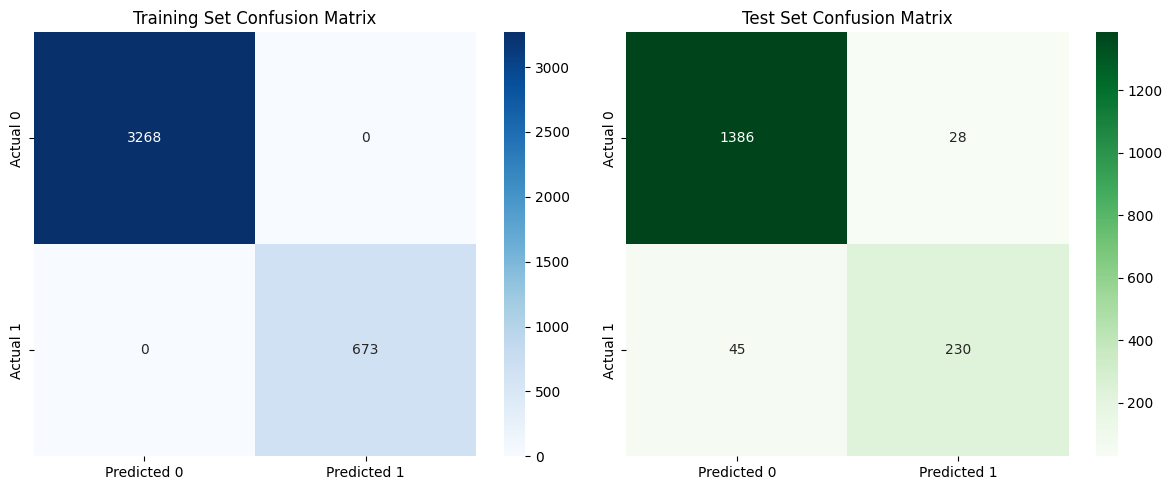

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix for train set
train_cm = confusion_matrix(y_train_encoded, y_train_pred)
# Confusion matrix for test set
test_cm = confusion_matrix(y_test_encoded, y_test_pred)

# Plot side-by-side confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'], ax=axes[0])
axes[0].set_title("Training Set Confusion Matrix")

sns.heatmap(test_cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'], ax=axes[1])
axes[1].set_title("Test Set Confusion Matrix")

plt.tight_layout()
plt.show()


In [79]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

# Initialize the model
xgb_classifier = XGBClassifier(objective='binary:logistic', random_state=42)

# Perform cross-validation on the training data
scores = cross_val_score(
    estimator=xgb_classifier,   # <-- Pass the model here
    X=X_train_encoded,
    y=y_train_encoded,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

print("Cross-Validation Scores (Accuracy):", scores)
print("Mean Accuracy Score:", scores.mean())


Cross-Validation Scores (Accuracy): [0.94676806 0.94670051 0.94416244 0.95431472 0.94923858]
Mean Accuracy Score: 0.9482368608982649


In [80]:


print("Cross-Validation Scores (Recall):", scores)
print("Mean Recall Score:", scores.mean())


Cross-Validation Scores (Recall): [0.94676806 0.94670051 0.94416244 0.95431472 0.94923858]
Mean Recall Score: 0.9482368608982649


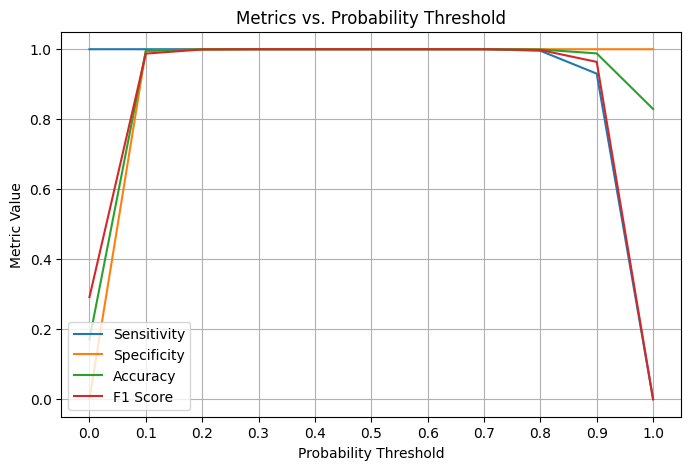

In [81]:
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Make sure your model is fitted first
xgb_classifier.fit(X_train_encoded, y_train_encoded)

# Calculate predicted probabilities for the train data
train_probabilities = xgb_classifier.predict_proba(X_train_encoded)[:, 1]

# Apply different thresholds to obtain binary predictions for train data
thresholds = np.arange(0, 1.1, 0.1)
sensitivity = []
specificity = []
accuracy = []
f1_scores = []

for threshold in thresholds:
    train_predictions = (train_probabilities >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_train_encoded, train_predictions).ravel()
    sensitivity.append(tp / (tp + fn))
    specificity.append(tn / (tn + fp))
    accuracy.append((tp + tn) / (tp + tn + fp + fn))
    f1_scores.append(f1_score(y_train_encoded, train_predictions))

# Plot the metrics against probability thresholds
plt.figure(figsize=(8,5))
plt.plot(thresholds, sensitivity, label='Sensitivity')
plt.plot(thresholds, specificity, label='Specificity')
plt.plot(thresholds, accuracy, label='Accuracy')
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.xlabel('Probability Threshold')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.ylabel('Metric Value')
plt.title('Metrics vs. Probability Threshold')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


Confusion Matrix (%)
                Training Set (%)  Test Set (%)
True Negative          82.923116     82.060391
False Positive          0.000000      1.657786
False Negative          0.000000      2.664298
True Positive          17.076884     13.617525


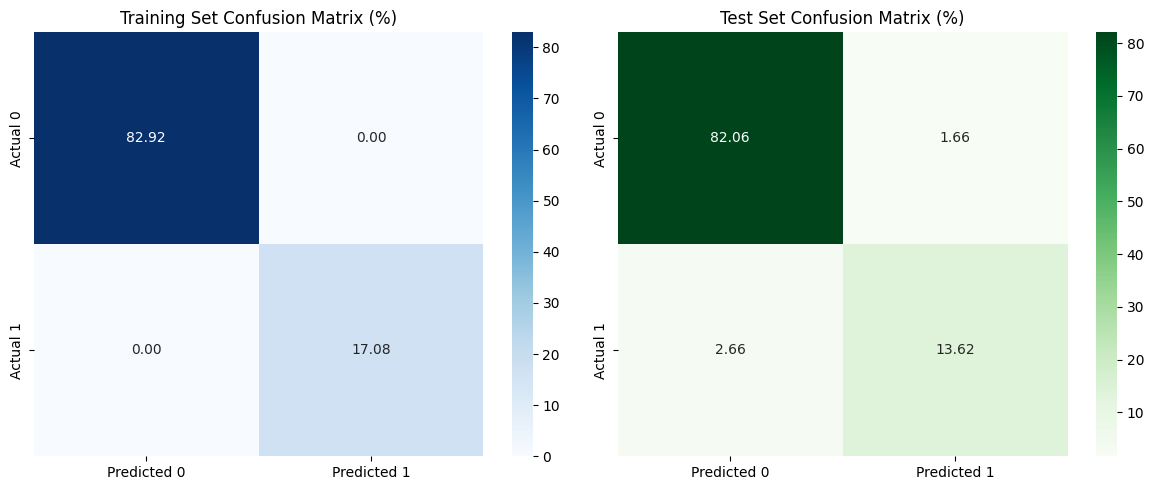

In [82]:
from sklearn.metrics import confusion_matrix

# Calculate predictions for the training set using a threshold of 0.50
train_predictions = (xgb_classifier.predict_proba(X_train_encoded)[:, 1] >= 0.50).astype(int)
train_confusion_matrix = confusion_matrix(y_train_encoded, train_predictions)

# Calculate predictions for the test set using a threshold of 0.50
test_predictions = (xgb_classifier.predict_proba(X_test_encoded)[:, 1] >= 0.50).astype(int)
test_confusion_matrix = confusion_matrix(y_test_encoded, test_predictions)

# Calculate the total number of samples in each set
train_total = len(y_train_encoded)
test_total = len(y_test_encoded)

# Calculate the confusion matrix in percentage form
train_confusion_matrix_percent = train_confusion_matrix / train_total * 100
test_confusion_matrix_percent = test_confusion_matrix / test_total * 100

# Create a dataframe for the confusion matrix (flattened)
confusion_matrix_df = pd.DataFrame({
    'Training Set (%)': train_confusion_matrix_percent.flatten(),
    'Test Set (%)': test_confusion_matrix_percent.flatten()
}, index=['True Negative', 'False Positive', 'False Negative', 'True Positive'])

print("Confusion Matrix (%)")
print(confusion_matrix_df)

# ---- Visualization ----
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Heatmap for Training set
sns.heatmap(train_confusion_matrix_percent, annot=True, fmt=".2f", cmap="Blues", 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'], ax=axes[0])
axes[0].set_title("Training Set Confusion Matrix (%)")

# Heatmap for Test set
sns.heatmap(test_confusion_matrix_percent, annot=True, fmt=".2f", cmap="Greens", 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'], ax=axes[1])
axes[1].set_title("Test Set Confusion Matrix (%)")

plt.tight_layout()
plt.show()

Shape of input features: (3941, 11)
Model expects input shape: (None, 11)
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
ROC AUC Score: 0.5529
Best threshold based on Youden's J: 0.3603


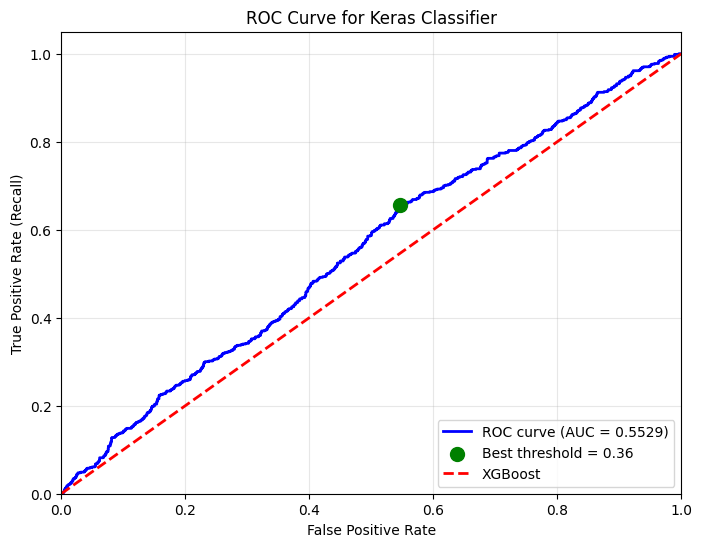

In [89]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np

# --- Step 1: Use the exact features the model was trained on ---
# ⚠️ Replace this list with the features you used during model training
train_features = ['Tenure', 
    'WarehouseToHome', 
    'HourSpendOnApp', 
    'NumberOfDeviceRegistered',
    'SatisfactionScore', 
    'NumberOfAddress', 
    'OrderAmountHikeFromlastYear',
    'CouponUsed', 
    'OrderCount', 
    'DaySinceLastOrder', 
    'CashbackAmount']
X_train_numeric = X_train[train_features].fillna(0).astype(np.float32)
X_train_array = X_train_numeric.values

print("Shape of input features:", X_train_array.shape)
print("Model expects input shape:", model.input_shape)

# --- Step 2: Predict probabilities for positive class ---
probabilities = model.predict(X_train_array).flatten()  # flatten → 1D

# --- Step 3: Compute FPR, TPR, thresholds ---
fpr, tpr, thresholds = roc_curve(y_train_encoded, probabilities)

# --- Step 4: Compute ROC-AUC score ---
roc_auc = roc_auc_score(y_train_encoded, probabilities)
print(f"ROC AUC Score: {roc_auc:.4f}")

# --- Step 5: Find best threshold using Youden's J statistic ---
J = tpr - fpr
best_idx = np.argmax(J)
best_threshold = thresholds[best_idx]
print(f"Best threshold based on Youden's J: {best_threshold:.4f}")

# --- Step 6: Plot ROC curve ---
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.scatter(fpr[best_idx], tpr[best_idx], color='green', s=100,
            label=f'Best threshold = {best_threshold:.2f}', zorder=5)

# Random baseline
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='XGBoost')

plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve for Keras Classifier')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


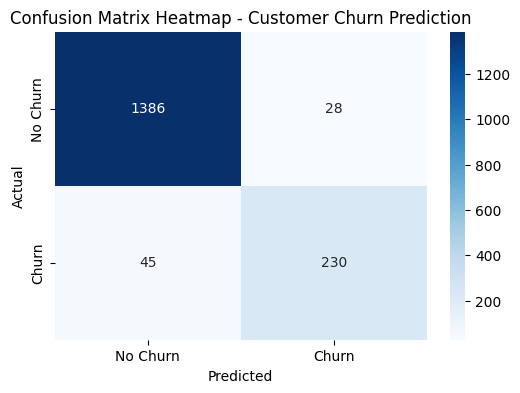

In [88]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Example: y_test = true values, y_pred = model predictions
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn","Churn"], yticklabels=["No Churn","Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap - Customer Churn Prediction")
plt.show()


In [90]:
import joblib


joblib.dump(xgb_classifier, 'customer_churn_classifier.pkl')

['customer_churn_classifier.pkl']

### 